<a href="https://colab.research.google.com/github/Shaunak-Mukherjee/ECE570-Artificial-Intelligence/blob/main/week_5_demo_mlp_on_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

Load and normalize the MNIST dataset (images of hand written digits)

In [2]:
trans = transforms. Compose([transforms. ToTensor(), transforms. Normalize((0.1307,), (0.3081,))])
# if not exist, download mnist dataset
train_set = torchvision. datasets. MNIST(root= './data', train= True , transform= trans, download= True)
test_set = torchvision. datasets. MNIST(root= './data', train= False , transform= trans, download= True )
print(train_set. data. shape)
print(test_set. data. shape)
batch_size = 60
train_loader = torch. utils. data. DataLoader(
dataset= train_set,
batch_size= batch_size,
shuffle= True )
test_loader = torch. utils. data. DataLoader(
dataset= test_set,
batch_size= batch_size,
shuffle= False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 36174150.86it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2356633.86it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4048614.22it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4903611.01it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


Visualizing sample images

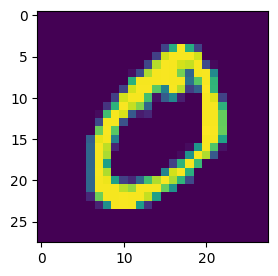

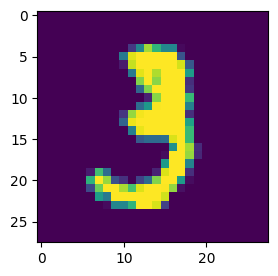

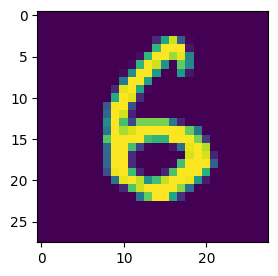

In [3]:
plt. figure(figsize= (3, 3))
plt. imshow(train_set. data[1,:,:])
plt. show()
plt. figure(figsize= (3, 3))
plt. imshow(train_set. data[10,:,:])
plt. show()
plt. figure(figsize= (3, 3))
plt. imshow(train_set. data[106,:,:])
plt. show()

Define the neural network

In [4]:
class Network(nn. Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(Network, self). __init__()
    self.l1 = nn. Linear(input_size, hidden_size)
    self.l2 = nn. Linear(hidden_size, hidden_size)
    self.l3 = nn. Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.l1(x)
    x = F.relu(x)
    x = self.l2(x)
    x = F.relu(x)
    x = self.l3(x)
    return x

In [5]:
input_size = 28* 28
hidden_size = 200
output_size = 10
net = Network(input_size,hidden_size,output_size)
print(net)

Network(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (l2): Linear(in_features=200, out_features=200, bias=True)
  (l3): Linear(in_features=200, out_features=10, bias=True)
)


In [6]:
for name, p in net. named_parameters():
  print(name,',',p. size(),type(p))

l1.weight , torch.Size([200, 784]) <class 'torch.nn.parameter.Parameter'>
l1.bias , torch.Size([200]) <class 'torch.nn.parameter.Parameter'>
l2.weight , torch.Size([200, 200]) <class 'torch.nn.parameter.Parameter'>
l2.bias , torch.Size([200]) <class 'torch.nn.parameter.Parameter'>
l3.weight , torch.Size([10, 200]) <class 'torch.nn.parameter.Parameter'>
l3.bias , torch.Size([10]) <class 'torch.nn.parameter.Parameter'>


Training

In [7]:
learning_rate = 0.1
optimizer = optim. SGD(net. parameters(), lr= learning_rate, momentum= 0.9)
criterion = nn. CrossEntropyLoss()

Testing

In [8]:
epochs = 2
loss_log = []
for epoch in range(epochs):
# trainning
  for batch_idx, (x, target) in enumerate(train_loader):
    optimizer. zero_grad()
    x = x. view(- 1,28* 28)
    out = net(x)
    loss = criterion(out, target)
    loss. backward()
    optimizer. step()
    if (batch_idx) % 100 == 0:
      print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'. format(
        epoch, batch_idx, loss. item()))

==>>> epoch: 0, batch index: 0, train loss: 2.293386
==>>> epoch: 0, batch index: 100, train loss: 0.239944
==>>> epoch: 0, batch index: 200, train loss: 0.087417
==>>> epoch: 0, batch index: 300, train loss: 0.907546
==>>> epoch: 0, batch index: 400, train loss: 0.271930
==>>> epoch: 0, batch index: 500, train loss: 0.426248
==>>> epoch: 0, batch index: 600, train loss: 0.189994
==>>> epoch: 0, batch index: 700, train loss: 0.308532
==>>> epoch: 0, batch index: 800, train loss: 0.211395
==>>> epoch: 0, batch index: 900, train loss: 0.387072
==>>> epoch: 1, batch index: 0, train loss: 0.044271
==>>> epoch: 1, batch index: 100, train loss: 0.110230
==>>> epoch: 1, batch index: 200, train loss: 0.204580
==>>> epoch: 1, batch index: 300, train loss: 0.013088
==>>> epoch: 1, batch index: 400, train loss: 0.215596
==>>> epoch: 1, batch index: 500, train loss: 0.196410
==>>> epoch: 1, batch index: 600, train loss: 0.141020
==>>> epoch: 1, batch index: 700, train loss: 0.119096
==>>> epoch: 1

In [9]:
with torch. no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images. reshape(- 1, 28* 28)
    outputs = net(images)
    _, predicted = torch. max(outputs. data, 1)
    total += labels. size(0)
    correct += (predicted == labels). sum(). item()
  print('Accuracy of the network on the 10000 test images: {} %'. format(100 * correct / total))

Accuracy of the network on the 10000 test images: 95.62 %
